In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline


In [2]:
#fetch raw file
raw_file=pd.read_csv("housing.csv")
raw_file

# Result: 10 culomns and 20640 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# figure out ALL data
raw_file.info()

# Result: float: 9, object: 1, total_bedrooms: missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# figure out float data
raw_file.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# figure out "ocean_proximity"
raw_file["ocean_proximity"].value_counts()

# Result: has 5 elements

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

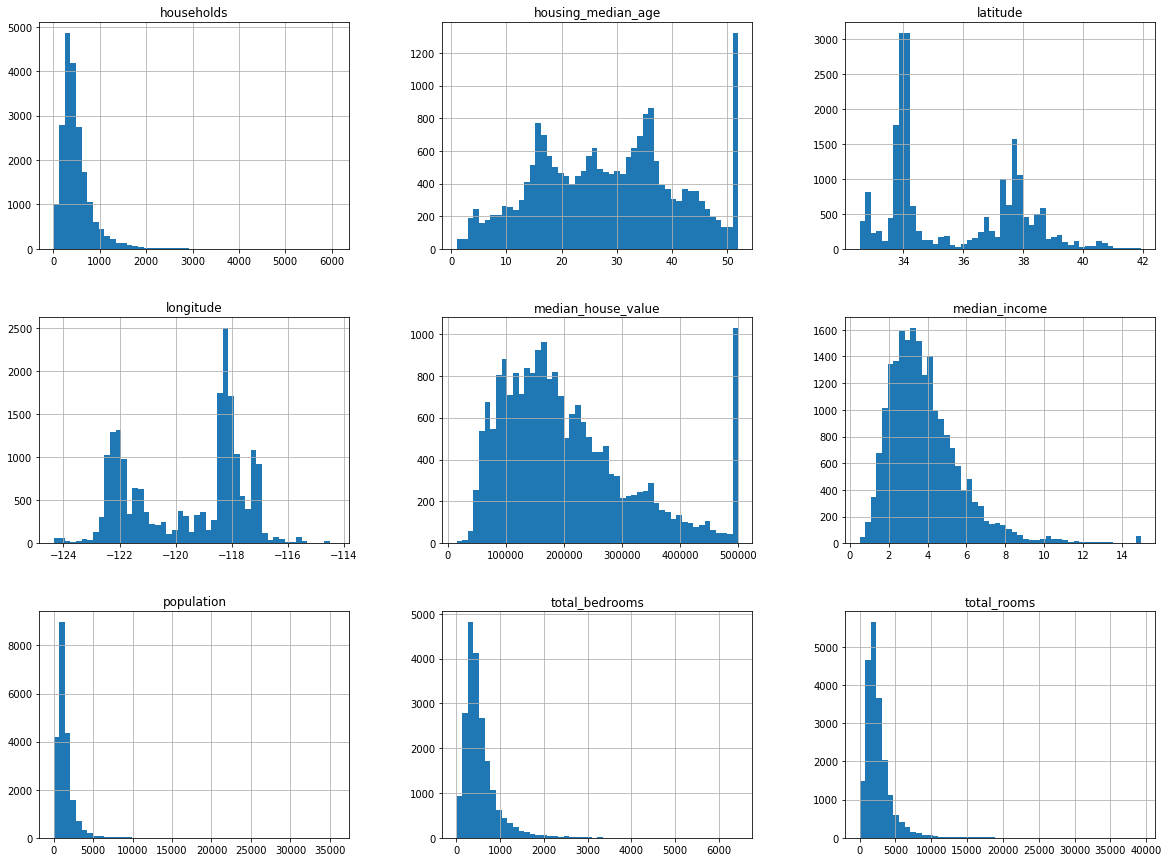

In [6]:
# plot
raw_file.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Premise
# 1. longitude & latitude: positioning data => ploting map
# 2. correlation: median income vs median house value
# 3. relation: total bedrooms & total rooms & households

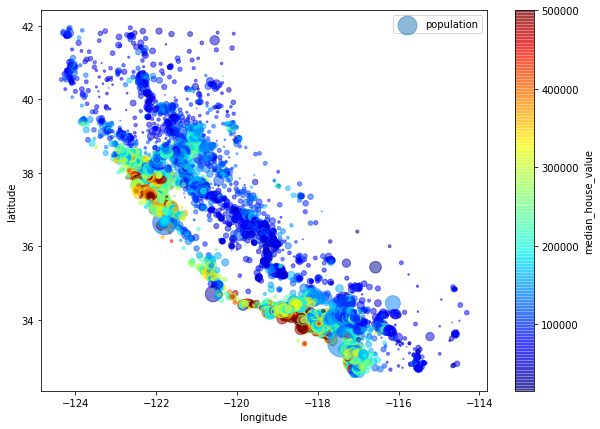

In [8]:
# mapping: longitude & latitude
raw_file.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, 
              s=raw_file["population"]/50, label="population",
              figsize=(10,7), c="median_house_value", 
              cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

# Result: relate among positioning vs population & house value

In [9]:
#correlation with "median house value"
corr_matrix=raw_file.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# Result: house value might has correation with income

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

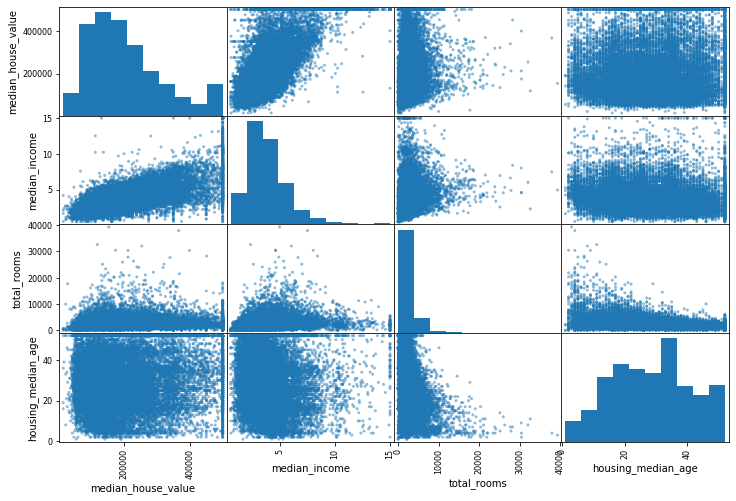

In [10]:
#plot corr with "median house value"
attr1=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(raw_file[attr1],figsize=(12,8))
plt.show()

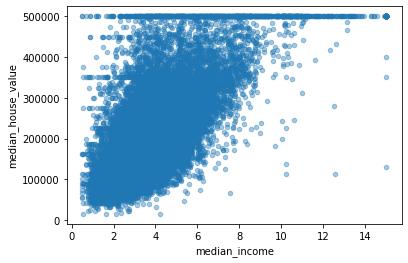

In [11]:
# plot "median income" vs "median house value"
raw_file.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.4)

In [12]:
# fill the NAN value to median value
fill_median=raw_file["total_bedrooms"].median()
raw_file["total_bedrooms"].fillna(fill_median, inplace=True)
raw_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
# Linear Regression
feature_cols = raw_file.columns.drop(['median_house_value',"ocean_proximity"])
X=raw_file[feature_cols]
y=raw_file["median_house_value"]

lr=LinearRegression()
lr.fit(X,y)
print("predict: ",lr.predict(X)[:5])
print("real: ",list(raw_file["median_house_value"])[:5])

predict:  [408844.60843989 420911.66915285 378857.45616479 320900.28599822
 253677.65142852]
real:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [14]:
# RMSE
lr_predict=lr.predict(X)
lr_rmse=np.sqrt(mean_squared_error(y,lr_predict))
lr_rmse

# Result: Not Good

69658.1903557702

In [15]:
# RandomForestRegression
rf=RandomForestRegressor()
rf.fit(X,y)
print("predict: ",rf.predict(X)[:5])
print("real: ",list(raw_file["median_house_value"])[:5])

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predict:  [448140.2 371350.  377760.1 350020.  300620. ]
real:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [16]:
# RMSE of RandomForestRegression
rf_predict=rf.predict(X)
rf_rmse=np.sqrt(mean_squared_error(y,rf_predict))
rf_rmse

# Result: Better than LinearRegression

21382.861559478653

In [17]:
# Model tuning
param_grid=[{"n_estimators": [3,10,30],"max_features": [2,4,6,8]},
           {"bootstrap": [False], "n_estimators": [3,10], "max_features": [2,3,4]}]
rf=RandomForestRegressor()
grid_search=GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [18]:
# Final Model
final_model=grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
final_predict=final_model.predict(X)
final_rmse=np.sqrt(mean_squared_error(y,final_predict))
final_rmse

20225.93757167941

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1989,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750
256,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604
7887,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990
4581,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199
1993,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206
10326,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700
10339,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470
12992,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586
10458,-117.65,33.48,6.0,1638.0,188.0,572.0,174.0,13.0502
1700,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666


In [22]:
X_test.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049
439,-122.29,37.85,52.0,477.0,119.0,218.0,106.0,2.5682
845,-122.07,37.58,16.0,1606.0,240.0,1117.0,268.0,6.0661
3768,-118.43,34.17,37.0,1982.0,331.0,794.0,340.0,5.9275
964,-121.89,37.68,12.0,7490.0,1207.0,3329.0,1136.0,6.3373
8681,-118.33,33.87,44.0,724.0,133.0,373.0,133.0,3.9167


In [23]:
y_train.head(10)

1989      47500.0
256      100000.0
7887     285800.0
4581     175000.0
1993      59200.0
10326    283200.0
10339    388700.0
12992    137000.0
10458    500001.0
1700     272400.0
Name: median_house_value, dtype: float64

In [24]:
y_test.head(10)

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
439      120000.0
845      247000.0
3768     336900.0
964      339700.0
8681     265600.0
Name: median_house_value, dtype: float64